In [1]:
from dataloading import DataLoader
from cv_py import CrossValidation
from visualize_py import Visualize
from eda_py import EDA
import implicit
from implicit.evaluation import train_test_split, ranking_metrics_at_k
from implicit.als import AlternatingLeastSquares
import pandas as pd
import numpy as np

In [2]:
%cd C:\Users\781110104\OneDrive - Genpact\Documents\VSCode

C:\Users\781110104\OneDrive - Genpact\Documents\VSCode


In [3]:
dl = DataLoader()
user_item_co_a = dl.import_data('AGCO', 'CO', 'df')
user_item_co_t = dl.import_data('TEREX', 'CO', 'df')

In [4]:
eda = EDA()

When keeping all user-item pairs, disregarding the number of users/item and vice versa

In [5]:
eda.get_basic_user_item_info(user_item_co_a, user_item_co_t)

,nouser,noitem,nnz,sparsity
co,303,338426,2847967,0.972227
po,40,54897,99267,0.954794


In [6]:
eda.get_user_per_item_frame(user_item_co_a, user_item_co_t)

,count,mean,std,min,25%,50%,75%,max
podl_upi,54897.0,1.808241,1.760623,1.0,1.00,1.0,2.00,18.0
codl_upi,338426.0,8.415332,17.968807,1.0,1.00,2.0,7.00,298.0
podl_ipu,40.0,2481.675000,4051.038926,141.0,833.25,1334.0,2104.75,23905.0
codl_ipu,303.0,9399.231023,10640.834156,519.0,3610.00,6214.0,10723.00,74843.0


After cutting out items with only one observation

In [7]:
co_a_filtered = dl.remove_low_interact_items(user_item_co_a, 1)
co_t_filtered = dl.remove_low_interact_items(user_item_co_t, 1)

In [8]:
eda.get_basic_user_item_info(co_a_filtered, co_t_filtered)

,nouser,noitem,nnz,sparsity
co,303,202000,2711541,0.955698
po,40,16690,61060,0.908538


In [9]:
eda.get_user_per_item_frame(co_a_filtered, co_t_filtered)

,count,mean,std,min,25%,50%,75%,max
podl_upi,16690.0,3.658478,2.297217,2.0,2.0,3.0,4.00,18.0
codl_upi,202000.0,13.423470,21.879773,2.0,3.0,5.0,13.00,298.0
podl_ipu,40.0,1526.500000,1399.299147,128.0,743.0,1118.0,1663.25,6992.0
codl_ipu,303.0,8948.980198,9621.547059,515.0,3408.5,6062.0,10502.00,63868.0


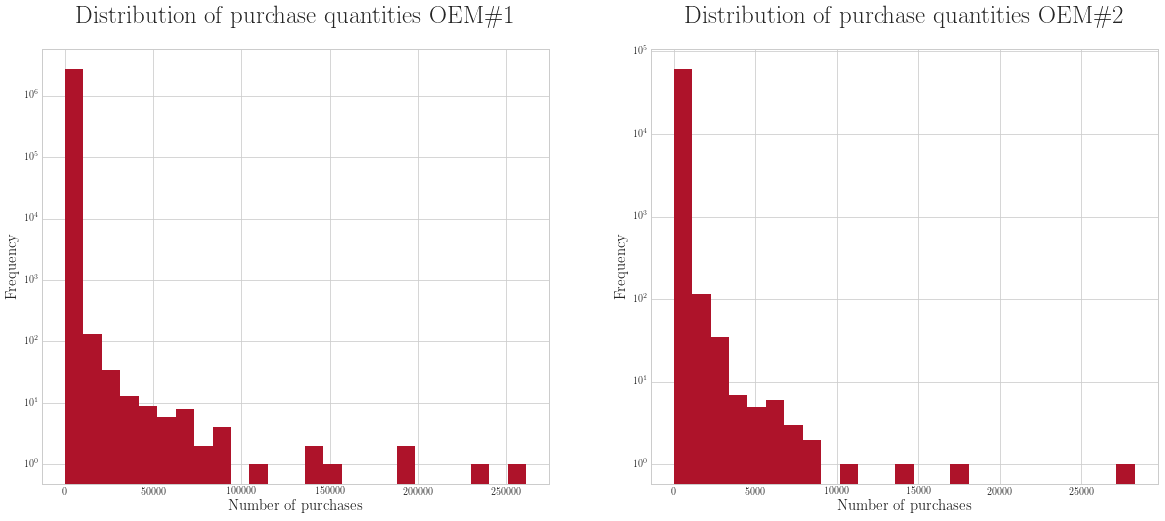

In [17]:
eda.get_purchase_histograms(co_a_filtered, co_t_filtered, scale_y='log', bins=25, save=True)

In [12]:
co_a_filtered_log = dl.log_scale_df(co_a_filtered, 0.01)
co_t_filtered_log = dl.log_scale_df(co_t_filtered, 0.01)

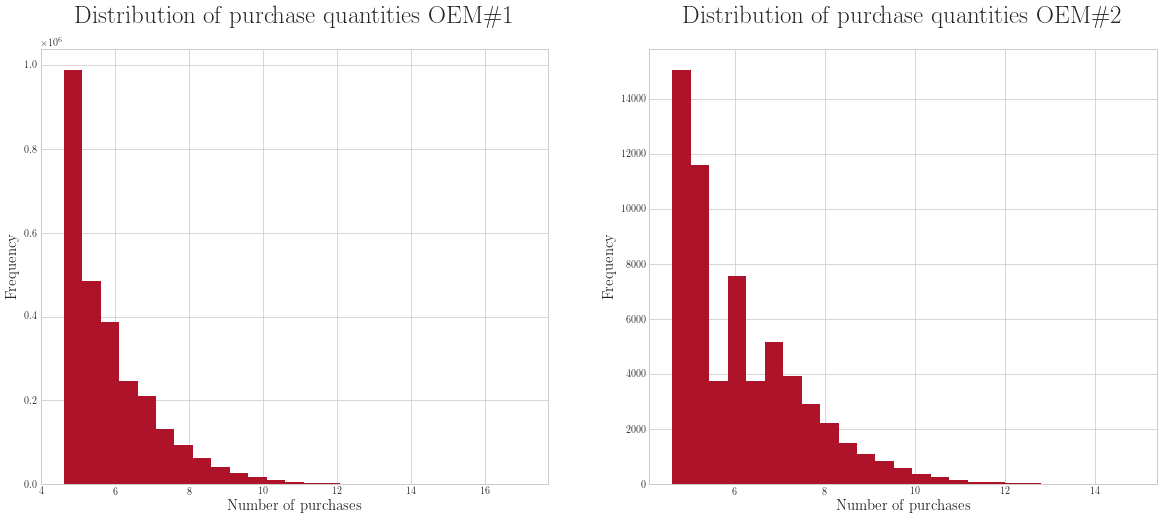

In [18]:
eda.get_purchase_histograms(co_a_filtered_log, co_t_filtered_log, bins=25, save=True)